# Install dependencies here

Install the fitting `tensorflow-gpu` version. Clone and install `tf-wavelets`. The wavelet database is used as initializer for the prefiltering network. Restart kernel to complete installation.

In [ ]:
#!pip install tensorflow-gpu==2.6.0
!git clone https://github.com/UiO-CS/tf-wavelets
!(cd tf-wavelets && python setup.py install)
!pip install tensorflow_addons
import os

os.kill(os.getpid(), 9)

Cloning into 'tf-wavelets'...
remote: Enumerating objects: 321, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 321 (delta 9), reused 21 (delta 9), pack-reused 300
Receiving objects: 100% (321/321), 5.71 MiB | 12.01 MiB/s, done.
Resolving deltas: 100% (157/157), done.
running install
running bdist_egg
running egg_info
creating tfwavelets.egg-info
writing tfwavelets.egg-info/PKG-INFO
writing dependency_links to tfwavelets.egg-info/dependency_links.txt
writing requirements to tfwavelets.egg-info/requires.txt
writing top-level names to tfwavelets.egg-info/top_level.txt
writing manifest file 'tfwavelets.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'tfwavelets.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/tfwavelets
copying tfwavelets/__init__.py -> build/lib/tfwavelets
copyin

# Pull and update AI here

Get `ReCSAI` from Github.



In [ ]:
!git clone https://github.com/super-resolution/ReCSAI

Cloning into 'CSrecon'...
remote: Enumerating objects: 2320, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 2320 (delta 4), reused 7 (delta 3), pack-reused 2307
Receiving objects: 100% (2320/2320), 460.72 MiB | 24.09 MiB/s, done.
Resolving deltas: 100% (1507/1507), done.
Checking out files: 100% (1605/1605), done.


Change the working directory to the cloned folder and check if everything is updated.

In [ ]:
%cd ReCSAI

/content/CSrecon
From https://github.com/super-resolution/CSrecon
 * branch            HEAD       -> FETCH_HEAD
Already up to date.


Import the required packages. 
* `train_cs_net` contains pretrained instances of `NetworkFacade`. A helper class to handle training and prediction of the networks.
* `plot_emitter_set` handles different kinds of visualizations.
* `Emitter` is a helper class to handle SMLM data.

In [ ]:
#!(dir)
import tensorflow as tf
#pretrained networks 
from src.trainings.train_cs_net import ResUNetFacade
from src.visualization import plot_emitter_set
from src.emitters import Emitter




# Using the example dataset
Skip this section if you'll upload your own files.

In [ ]:
import gdown
url = "https://drive.google.com/uc?export=download&id=1xlh5ELa5QifMV_KY1d0IlxUivx1alM9y"
path = "./example_data.tif"
gdown.download(url, path, quiet=False)

# Upload your file as tif
Skip this section if you work with the example dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Cy5_MT_100us_101nm_45px_Framesfrq2.4Hz_Linefrq108.7Hz_5kW_7500Frames_kept stack.tif to Cy5_MT_100us_101nm_45px_Framesfrq2.4Hz_Linefrq108.7Hz_5kW_7500Frames_kept stack.tif


In [ ]:
with open("image_data.tif", 'wb') as f:
    f.write(uploaded[list(uploaded.keys())[0]])
path = "./image_data.tif"

# Load training checkpoints

Pick one of the following network architectures for fitting. The latest checkpoint will be loaded automatically
* `ResUNetFacade`: CS via algorithm unrolling. Fast and accurate (training provided)
* `CSInceptionNetFacade`: CS algorithm integrated in inception architecture
* `CSUNetFacade`: CS algorithm integrated in U-net architecture
* `CNNNetFacade`: CS algorithm used as prior for a CNN

In [ ]:
facade = ResUNetFacade()

(None, 16, 8, 1) (None, 16, 8, 1)
(None, 16, 8, 1) (None, 16, 8, 1)
(None, 32, 16, 1) (None, 32, 16, 1)
(None, 32, 16, 1) (None, 32, 16, 1)
(None, 64, 32, 1) (None, 64, 32, 1)
(None, 64, 32, 1) (None, 64, 32, 1)
(None, 128, 64, 1) (None, 128, 64, 1)
(None, 128, 64, 1) (None, 128, 64, 1)
initializing metrics from scratch
Initializing from scratch.


# Run AI and plot image

Feed your parameters to the current network instance. 
* `facade.sigma`: the expected standard deviation of your emitters Point Spread Function (FWHM/2.3548) [px*100]. 
* `facade.threshold`: minimal probability of a feature space pixel to be accepted as localization. 

Results of `facade.predict` are by default returned as emitter sets with the attributes: 
* `emitters.xyz` coordinate positions of the emitters in $nm$  
* `emitters.photons` relative intensity of the emitters $\in [0,1]$
* `emitters.frames` corresponding frame to each emitter
* `emitters.p` feature space probability of the emitter
* `emitters.sigxsigy` uncertainty in $x$ and $y$ direction in $px$

Giving `facade.predict` the kwarg `raw=True` the feature space is returned as numpy array.

`plot_emitter_set` builds a visualization of the data by rendering the point cloud of emitters weighted by their intensity.

<tifffile.TiffPage 0 @8> imagej_metadata failed with ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


41
4
(None, 16, 8, 1) (None, 16, 8, 1)
(None, 16, 8, 1) (None, 16, 8, 1)
(None, 32, 16, 1) (None, 32, 16, 1)
(None, 32, 16, 1) (None, 32, 16, 1)
(None, 64, 32, 1) (None, 64, 32, 1)
(None, 64, 32, 1) (None, 64, 32, 1)
(None, 128, 64, 1) (None, 128, 64, 1)
(None, 128, 64, 1) (None, 128, 64, 1)
51750
1
60882
2
51238
3
37586
4


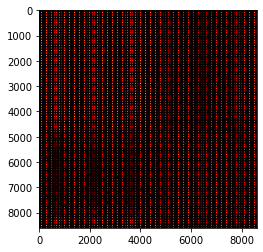

In [ ]:
facade.sigma = 180
facade.wavelet_thresh = 0.04
facade.threshold = 0.15
emitters = facade.predict(path)

plot_emitter_set(emitters)

# Use localisation based drift correct (https://github.com/qnano/drift-estimation)

In [ ]:
emitters.use_dme_drift_correct()

OSError: ignored

# Upload drift correct
Upload a customn drift correct file as csv or json.
csv expects an dataframe with [frame, drift_x, drift_y] for all collected frames.
Json expects a RCC C-Spline parameterized drift correct i.e. as in Thunderstorm. 

In [ ]:
import io

drift = files.upload()
drift[list(drift.keys())[0]]
df2 = pd.read_csv(io.BytesIO(drift[list(drift.keys())[0]]))
emitters.apply_drift(df2)
plot_emitter_set(emitters)

NameError: ignored

# Filtering
Filter your emitters to allow a range of certain parameters. Valid paramters are the emitterset properties described in Run AI and plot image.


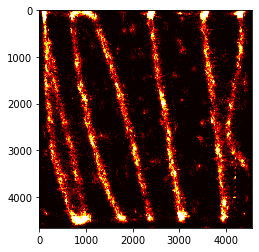

In [ ]:
emitter_filtered = emitters.filter(sig_x=0.5, sig_y=0.5, photons=0.1)
plot_emitter_set(emitter_filtered)